In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 79ms/step - loss: 0.4984 - acc: 0.7885 - val_loss: 0.3729 - val_acc: 0.8645
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2883 - acc: 0.9051 - val_loss: 0.3127 - val_acc: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2102 - acc: 0.9307 - val_loss: 0.2763 - val_acc: 0.8929
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1719 - acc: 0.9452 - val_loss: 0.3427 - val_acc: 0.8626
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1386 - acc: 0.9564 - val_loss: 0.2882 - val_acc: 0.8862
Epoch 6/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1146 - acc: 0.9645 - val_loss: 0.3059 - val_acc: 0.8818
Epoch 7/20
30/30 [==============================] - 3s 88ms/step - loss: 0.0955 - acc: 0.9717 - val_loss: 0.3662 - val_acc: 0.8667
Epoch 8/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0798 - a

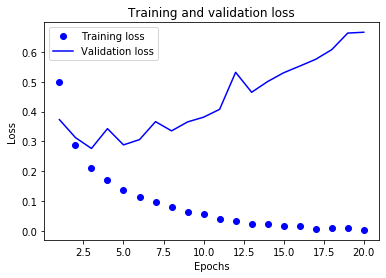

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

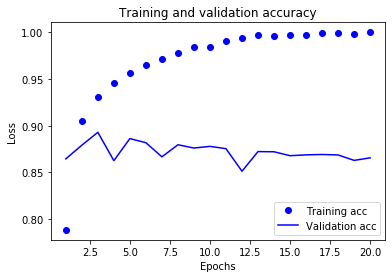

In [11]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4690 - accuracy: 0.8214
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2694 - accuracy: 0.9063
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2044 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 6s 7ms/step - loss: 0.3023 - accuracy: 0.8802
[0.30231937766075134, 0.8802400231361389]


In [13]:
model.predict(x_test)

array([[0.27789855],
       [0.9999558 ],
       [0.957018  ],
       ...,
       [0.18784201],
       [0.11172798],
       [0.7699256 ]], dtype=float32)

Epoch 1/6
30/30 [==============================] - 2s 60ms/step - loss: 0.1387 - acc: 0.9560 - val_loss: 0.2842 - val_acc: 0.8878
Epoch 2/6
30/30 [==============================] - 1s 36ms/step - loss: 0.1153 - acc: 0.9644 - val_loss: 0.2991 - val_acc: 0.8834
Epoch 3/6
30/30 [==============================] - 2s 53ms/step - loss: 0.0938 - acc: 0.9713 - val_loss: 0.3162 - val_acc: 0.8836
Epoch 4/6
30/30 [==============================] - 1s 30ms/step - loss: 0.0765 - acc: 0.9783 - val_loss: 0.3635 - val_acc: 0.8719
Epoch 5/6
30/30 [==============================] - 1s 30ms/step - loss: 0.0643 - acc: 0.9831 - val_loss: 0.3982 - val_acc: 0.8688
Epoch 6/6
30/30 [==============================] - 1s 30ms/step - loss: 0.0508 - acc: 0.9869 - val_loss: 0.3867 - val_acc: 0.8752


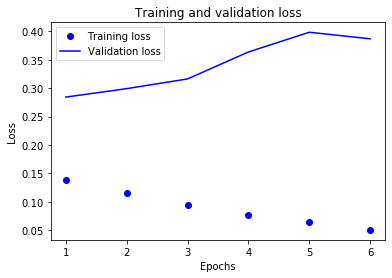

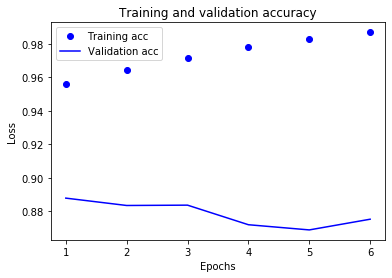

array([[0.5198256 ],
       [0.5388982 ],
       [0.5385691 ],
       ...,
       [0.5061559 ],
       [0.5164857 ],
       [0.51161647]], dtype=float32)

In [16]:
#experimenting with less dense layers
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))


history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
epochs2 = range(1, len(history_dict2['acc']) + 1)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']
plt.plot(epochs2, acc_values2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


model2.predict(x_test)

Having less layers resulted in predictions that are not certain. The predictions range around 50% probability which doesn't add much value.

Epoch 1/6
30/30 [==============================] - 2s 63ms/step - loss: 0.0399 - acc: 0.9919 - val_loss: 0.4213 - val_acc: 0.8746
Epoch 2/6
30/30 [==============================] - 1s 30ms/step - loss: 0.0345 - acc: 0.9927 - val_loss: 0.4513 - val_acc: 0.8722
Epoch 3/6
30/30 [==============================] - 1s 28ms/step - loss: 0.0268 - acc: 0.9948 - val_loss: 0.4913 - val_acc: 0.8717
Epoch 4/6
30/30 [==============================] - 1s 30ms/step - loss: 0.0211 - acc: 0.9963 - val_loss: 0.5120 - val_acc: 0.8713
Epoch 5/6
30/30 [==============================] - 1s 32ms/step - loss: 0.0172 - acc: 0.9974 - val_loss: 0.5423 - val_acc: 0.8706
Epoch 6/6
30/30 [==============================] - 1s 43ms/step - loss: 0.0131 - acc: 0.9983 - val_loss: 0.5754 - val_acc: 0.8690


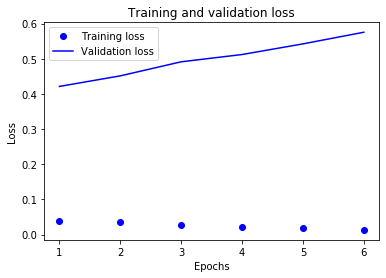

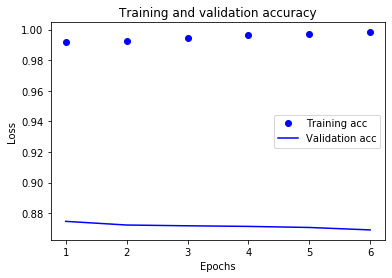

array([[0.50364715],
       [0.49600986],
       [0.5040899 ],
       ...,
       [0.5003968 ],
       [0.48998576],
       [0.50799656]], dtype=float32)

In [17]:
#experimenting with more dense layers
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))


history_dict2 = history3.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
epochs2 = range(1, len(history_dict2['acc']) + 1)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']
plt.plot(epochs2, acc_values2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


model3.predict(x_test)

again similar output. The predictions are around 50%. The difference between the loss from training and validation sets is huge.

Epoch 1/6
30/30 [==============================] - 2s 59ms/step - loss: 0.0122 - acc: 0.9980 - val_loss: 0.6166 - val_acc: 0.8674
Epoch 2/6
30/30 [==============================] - 1s 38ms/step - loss: 0.0059 - acc: 0.9998 - val_loss: 0.6867 - val_acc: 0.8589
Epoch 3/6
30/30 [==============================] - 1s 35ms/step - loss: 0.0073 - acc: 0.9989 - val_loss: 0.6810 - val_acc: 0.8685
Epoch 4/6
30/30 [==============================] - 1s 43ms/step - loss: 0.0069 - acc: 0.9985 - val_loss: 0.7161 - val_acc: 0.8665
Epoch 5/6
30/30 [==============================] - 1s 29ms/step - loss: 0.0026 - acc: 0.9999 - val_loss: 0.7459 - val_acc: 0.8641
Epoch 6/6
30/30 [==============================] - 1s 24ms/step - loss: 0.0059 - acc: 0.9986 - val_loss: 0.7771 - val_acc: 0.8645


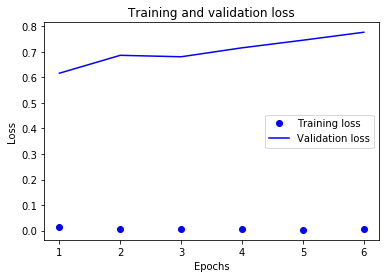

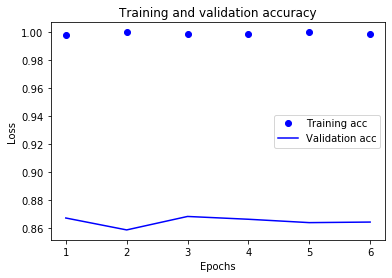

array([[0.5351937 ],
       [0.67231566],
       [0.6063809 ],
       ...,
       [0.53167117],
       [0.59064543],
       [0.5305041 ]], dtype=float32)

In [18]:
#experimenting with more hidden units
model4 = models.Sequential()
model4.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history4 = model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))


history_dict2 = history4.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
epochs2 = range(1, len(history_dict2['acc']) + 1)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']
plt.plot(epochs2, acc_values2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


model4.predict(x_test)

Similar to having more layers. The model over learns causing a wider gap between training and validation accuracy and worse predictions.

Epoch 1/6
30/30 [==============================] - 2s 74ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.8010 - val_acc: 0.8645
Epoch 2/6
30/30 [==============================] - 1s 48ms/step - loss: 0.0037 - acc: 0.9993 - val_loss: 0.8599 - val_acc: 0.8605
Epoch 3/6
30/30 [==============================] - 1s 41ms/step - loss: 9.9850e-04 - acc: 0.9999 - val_loss: 0.8759 - val_acc: 0.8616
Epoch 4/6
30/30 [==============================] - 1s 39ms/step - loss: 7.9315e-04 - acc: 0.9999 - val_loss: 0.9232 - val_acc: 0.8611
Epoch 5/6
30/30 [==============================] - 1s 30ms/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.9687 - val_acc: 0.8595
Epoch 6/6
30/30 [==============================] - 2s 55ms/step - loss: 4.0754e-04 - acc: 1.0000 - val_loss: 0.9864 - val_acc: 0.8596


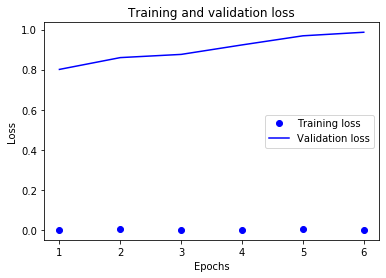

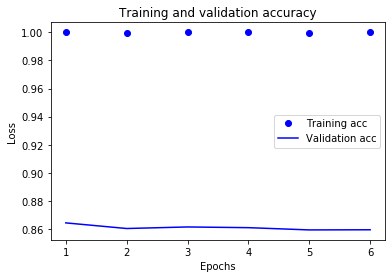

array([[0.49022192],
       [0.50851494],
       [0.5214282 ],
       ...,
       [0.5101958 ],
       [0.50879383],
       [0.51383567]], dtype=float32)

In [19]:
#experimenting with an mse loss function
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))
model5.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model5.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
history5 = model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))


history_dict2 = history5.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
epochs2 = range(1, len(history_dict2['acc']) + 1)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']
plt.plot(epochs2, acc_values2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


model5.predict(x_test)

bad, using the right loss function is really important

Epoch 1/6
30/30 [==============================] - 2s 61ms/step - loss: 3.3854e-04 - acc: 1.0000 - val_loss: 1.0345 - val_acc: 0.8600
Epoch 2/6
30/30 [==============================] - 1s 45ms/step - loss: 0.0030 - acc: 0.9995 - val_loss: 1.0653 - val_acc: 0.8610
Epoch 3/6
30/30 [==============================] - 1s 39ms/step - loss: 1.9079e-04 - acc: 1.0000 - val_loss: 1.0833 - val_acc: 0.8595
Epoch 4/6
30/30 [==============================] - 3s 108ms/step - loss: 1.5968e-04 - acc: 1.0000 - val_loss: 1.1188 - val_acc: 0.8586 - loss: 1.5664e-0
Epoch 5/6
30/30 [==============================] - 4s 124ms/step - loss: 0.0030 - acc: 0.9990 - val_loss: 1.1690 - val_acc: 0.8606
Epoch 6/6
30/30 [==============================] - 2s 53ms/step - loss: 9.7331e-05 - acc: 1.0000 - val_loss: 1.1781 - val_acc: 0.8601


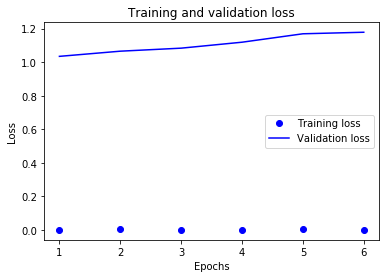

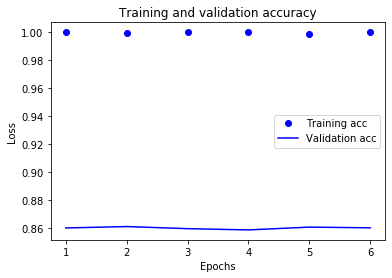

array([[0.4814842 ],
       [0.42834252],
       [0.48028642],
       ...,
       [0.5061941 ],
       [0.4747703 ],
       [0.5661148 ]], dtype=float32)

In [20]:
#experimenting with elu activation
model6 = models.Sequential()
model6.add(layers.Dense(16, activation='elu', input_shape=(10000,)))
model6.add(layers.Dense(16, activation='elu'))
model6.add(layers.Dense(1, activation='sigmoid'))
model6.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history6 = model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))


history_dict2 = history6.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
epochs2 = range(1, len(history_dict2['acc']) + 1)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']
plt.plot(epochs2, acc_values2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_values2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


model6.predict(x_test)

relu is magic :D. using the right activation is important